In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from scipy import linalg
import math
import numpy.linalg as LA

In [ ]:
def hermitian(arr):
    return np.conjugate(arr.T)

In [ ]:
math.atan(-1.7320508)*360/(2*np.pi)

-59.99999989158382

In [ ]:
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs

In [ ]:
A = 1.0    # 振幅
f = 1.0    # 周波数 Hz

In [ ]:
signals = []
for i in range(10):
    signals.append(A*np.sin(4*np.pi*f*t-np.pi/2*i/5))

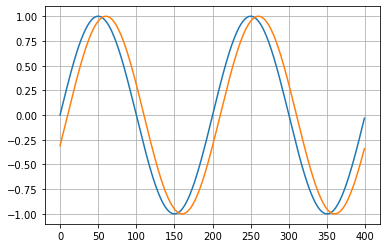

In [ ]:
plt.plot(signals[0])
plt.plot(signals[1])
plt.grid()
plt.show()

In [ ]:
np.std(signals[1])

0.7071067811865476

In [ ]:
np.mean(signals[0])

1.7763568394002505e-17

In [ ]:
signals_mod = []
for s in signals:
    signals_mod.append((s - np.mean(s)) / np.std(s))

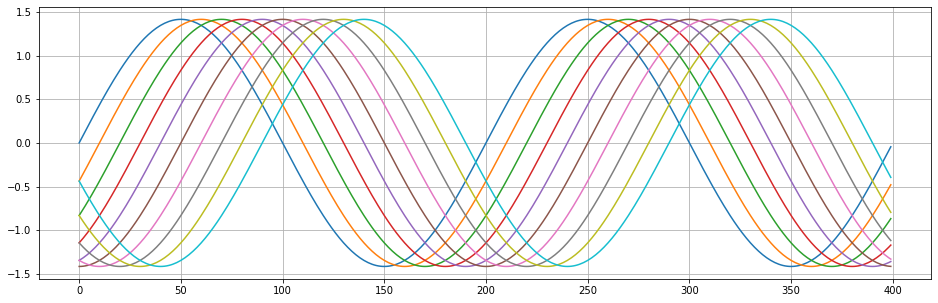

In [ ]:
fig = plt.figure(figsize=(16,5))
for i in range(10):
    plt.plot(signals_mod[i])
plt.grid()
plt.show()

In [ ]:
corr_matrix_normal = np.dot(np.array(signals_mod), np.array(signals_mod).T) * (1/400)

In [ ]:
len(signals[0])

400

In [ ]:
np.corrcoef(signals_mod[0],signals_mod[0])

array([[1., 1.],
       [1., 1.]])

In [ ]:
np.dot(np.array(signals_mod[0]), np.array(signals_mod[0]))

400.0

In [ ]:
corr_matrix_normal[0,0]

1.0

In [ ]:
corr_matrix_normal.shape

(10, 10)

In [ ]:
analytic_signals = []
for i in range(10):
    analytic_signals.append(hilbert(signals_mod[i]))

In [ ]:
analytic_signals_np = np.array(analytic_signals)

In [ ]:
analytic_signals_np_h = hermitian(analytic_signals_np)

In [ ]:
corr_matrix = np.dot(analytic_signals_np, analytic_signals_np_h) * (1/400)

In [ ]:
corr_matrix.shape

(10, 10)

In [ ]:
w, v = LA.eig(corr_matrix)

In [ ]:
w.real

array([ 3.94430453e-31,  2.00000000e+01, -2.04495991e-15,  1.68992513e-15,
       -1.38150974e-15,  5.83566044e-16,  7.72638482e-16, -3.66671411e-16,
        1.25742511e-16, -1.14958970e-16])

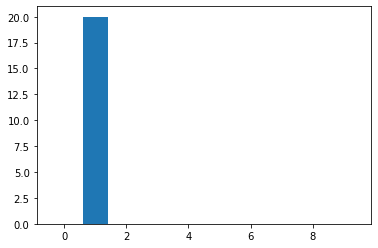

In [ ]:
plt.bar(x=[i for i in range(10)], height=w.real)
plt.show()

In [ ]:
v.T[1]

array([ 3.00750478e-01+0.09771975j,  3.16227766e-01+0.j        ,
        3.00750478e-01-0.09771975j,  2.55833637e-01-0.18587402j,
        1.85874017e-01-0.25583364j,  9.77197538e-02-0.30075048j,
       -9.71445147e-17-0.31622777j, -9.77197538e-02-0.30075048j,
       -1.85874017e-01-0.25583364j, -2.55833637e-01-0.18587402j])

In [ ]:
markers1 = ["D", ",", "o", "v", "^", "<", ">", "*", "h", "H"]

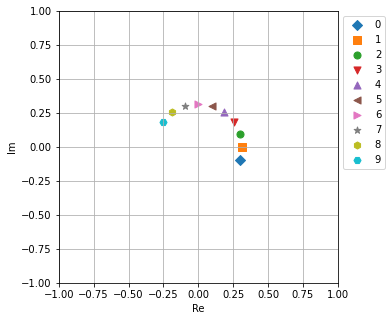

In [ ]:
k = 1
fig = plt.figure(figsize=(5,5))
for i in range(10):
    plt.scatter(v.T[k].real[i], -v.T[k].imag[i], marker=markers1[i],s=50, label=str(i))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('Re')
plt.ylabel('Im')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


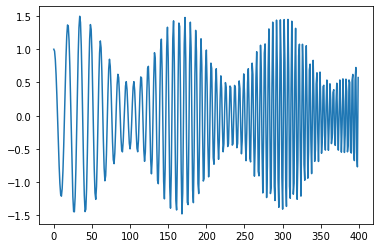

In [ ]:
plt.plot(analytic_signal)
plt.show()

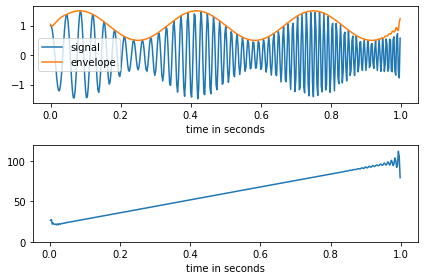

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)
fig.tight_layout()